In [2]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.dtypes
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [6]:
print(df_can.shape)

(195, 43)


In [7]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.columns=list(map(str,df_can.columns))
df_can.set_index('Country',inplace=True)
df_can['Total']=df_can.sum(axis=1)
years=list(map(str,range(1980,2014)))
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
print(mpl.__version__)

3.1.3


In [10]:
df_can.sort_values(['Total'],ascending=False,axis=0,inplace=True)
# get top 5 enteries
df_top5=df_can.head()
#transpose the data frame
df_top5=df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


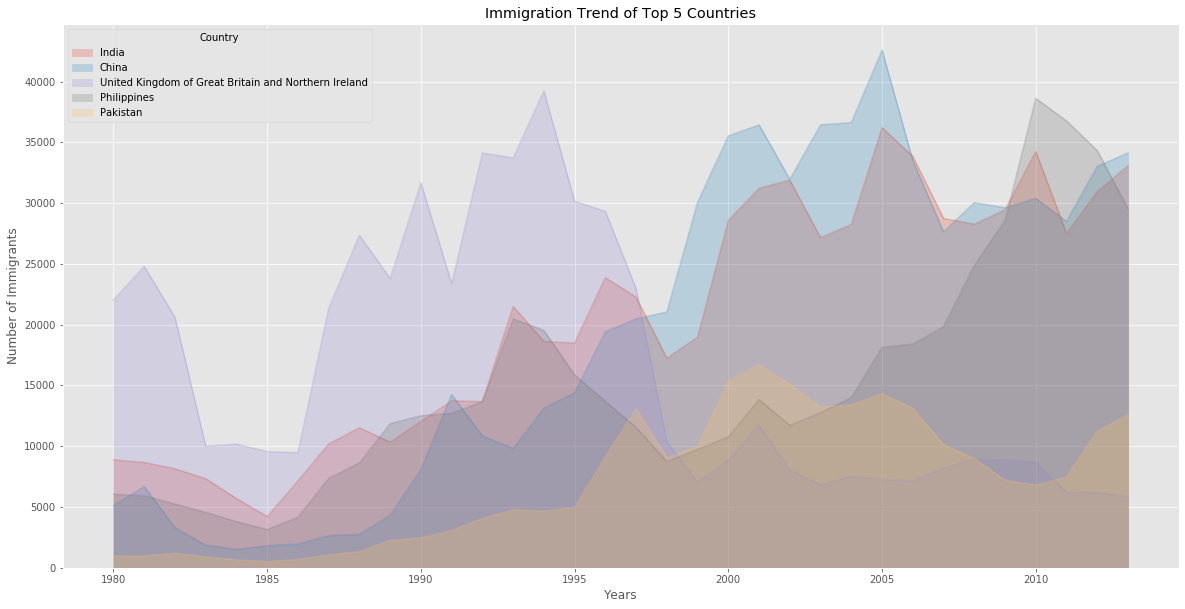

In [11]:
df_top5.plot(kind='area',alpha=0.25,stacked=False,figsize=(20,10),)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()
#df_top5=df_top5.transpose()
#df_top5.head()

In [19]:
df_bottom5=df_can.tail()
df_bottom5=df_bottom5[years].transpose()
df_bottom5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


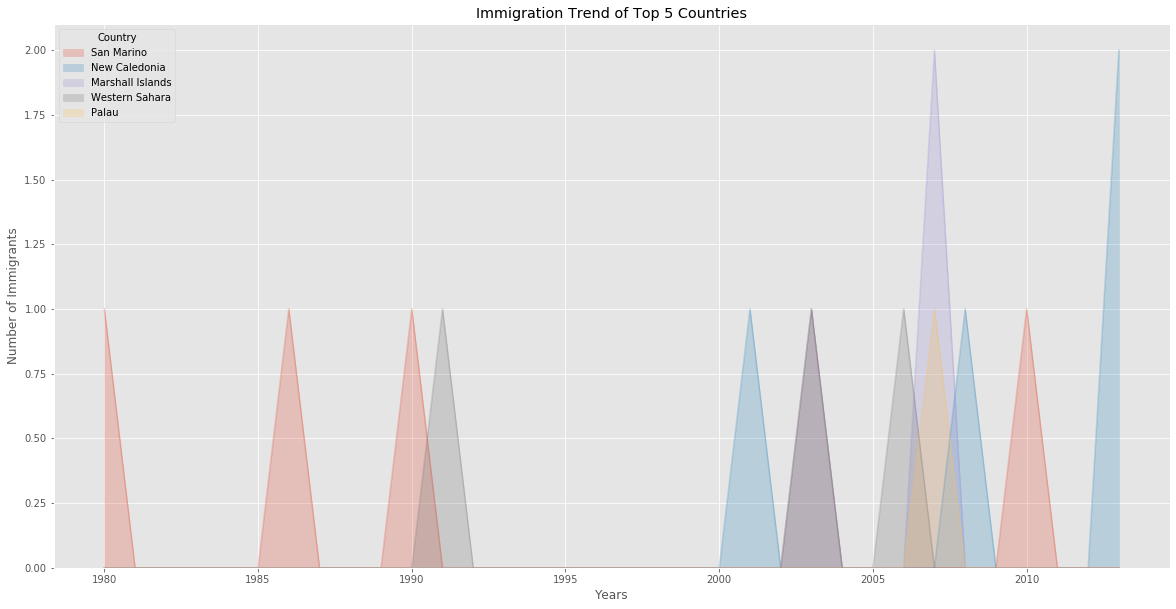

In [24]:
df_bottom5.plot(kind='area',alpha=0.25,stacked=False,figsize=(20,10),)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


<h1>HISTOGRAM</h1>

In [27]:
count,bin_edges=np.histogram(df_can['2013'])
print(count)
print(bin_edges)



[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


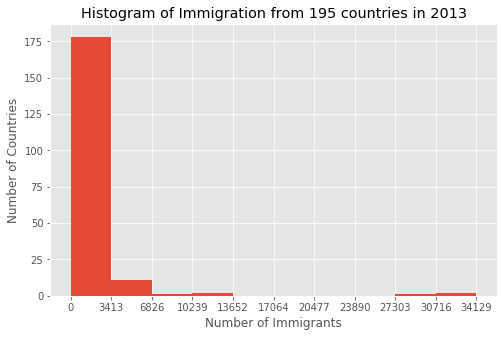

In [28]:
df_can['2013'].plot(kind='hist',figsize=(8,5),xticks=bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.show()

<h1>BAR PLOT</h1><br>
<p>kind=bar creates a vertical bar plot<br>
kind=barh creates a horizontal bar plot<p>

In [30]:
df_iceland=df_can.loc['Iceland',years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

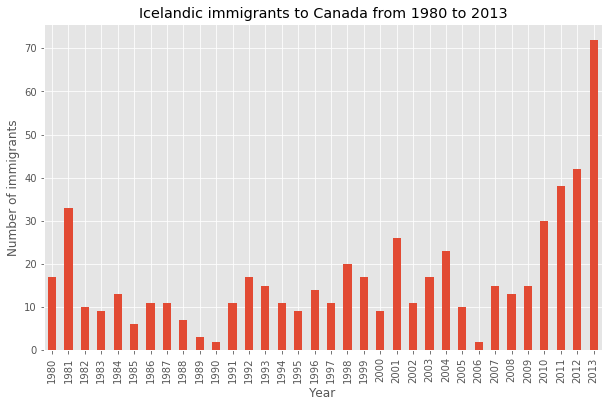

In [36]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()